<a href="https://colab.research.google.com/github/Zainaazar/Algorithms/blob/main/Iris_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##🌷 Iris Species Classification using Logistic Regression
This notebook demonstrates a Supervised Classification task using Logistic Regression to predict the species of Iris flowers based on their physical measurements (sepal and petal dimensions).

##Importing Libraries and Loading Data
We import essential libraries for data handling (pandas, numpy), visualization (matplotlib, seaborn), model training (sklearn.model_selection, LogisticRegression), and evaluation (sklearn.metrics).

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
df = pd.read_csv('Iris.csv')

##2. Initial Data Inspection and Feature/Target Separation
We perform a quick check of the data structure (df.info()) and define our feature matrix (x) by dropping the target column, and define our target vector (y) as the 'Species' column.

In [7]:
# Display information about the DataFrame
print("--- DataFrame Info ---")
df.info()

# Display columns
print("\n--- Columns ---")
print(df.columns)

# Separate features (X) and target (y)
# Drop the 'Species' column and the initial 'Id' column (if present, though the example code implicitly handles it)
x = df.drop(columns=["Species"])
y = df['Species']

print("\nFeatures (X) shape:", x.shape)
print("Target (y) shape:", y.shape)

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

--- Columns ---
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Features (X) shape: (150, 5)
Target (y) shape: (150,)


##Data Splitting, Model Training, and Prediction
The data is split into 80% for training and 20% for testing to evaluate generalization performance. We then initialize the Logistic Regression model and train it using the training data.

In [8]:
# Split data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
# Note: LogisticRegression is a linear model for classification, despite its name.
model = LogisticRegression(max_iter=200) # Increased max_iter for convergence stability

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Model Evaluation (Classification Report and Confusion Matrix)
We evaluate the model using the Classification Report, which provides detailed metrics (Precision, Recall, F1-Score) for each species class. We also visualize the Confusion Matrix to show the count of correct and incorrect predictions for each class.


--- Classification Report ---
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



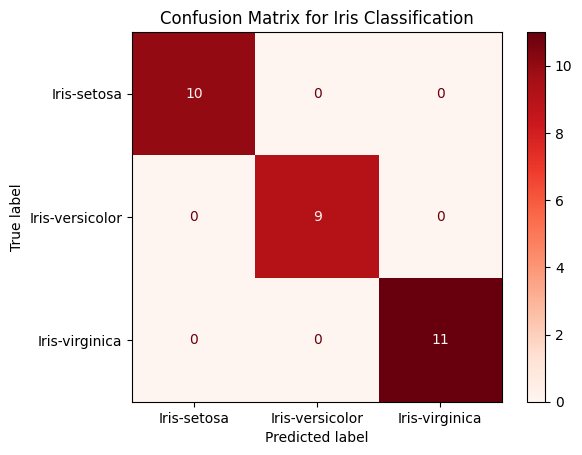

In [9]:
# Print the Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Compute and display the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix
disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp.plot(cmap='Reds')
plt.title("Confusion Matrix for Iris Classification")
plt.show()

##Data Visualization (Scatter Plot)

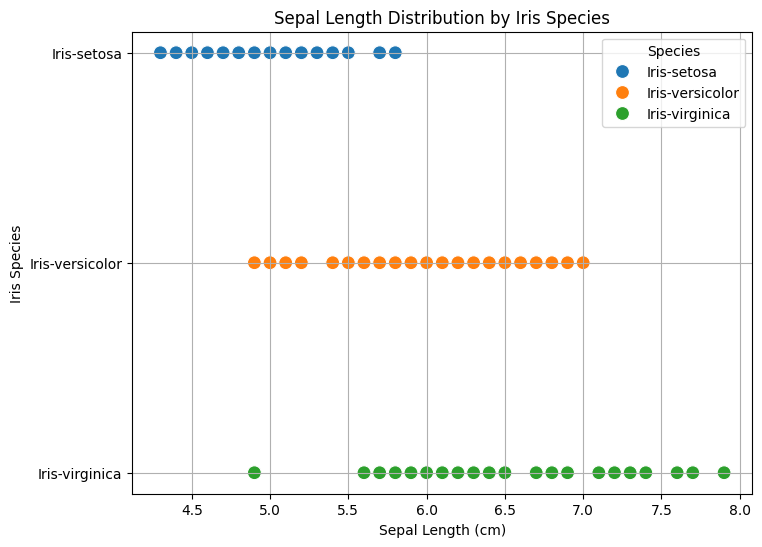

In [10]:
# Visualize the relationship between Sepal Length and Species
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='SepalLengthCm', y='Species', hue='Species', s=100)
plt.title("Sepal Length Distribution by Iris Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Iris Species")
plt.grid(True)
plt.show()